# Method of transforming whole image to png

In [1]:
import openslide
from tqdm import tqdm
from PIL import Image
import numpy as np
import os

def resize_ndpi_image(ndpi_path, output_path, target_size=(1024, 1024)):
    slide = openslide.OpenSlide(ndpi_path)
    
    # Choose a level with reasonable resolution
    level = slide.get_best_level_for_downsample(32)
    thumbnail = slide.read_region((0, 0), level, slide.level_dimensions[level])
    
    # Convert to RGB and resize
    thumbnail = thumbnail.convert("RGB")
    resized = thumbnail.resize(target_size, Image.Resampling.LANCZOS)

    
    resized.save(output_path)

In [8]:
# input_dir = "/Volumes/Maxtor/CONTINUACION Basurto y Cruces"  # 1
input_dir = "/Volumes/Maxtor/ONKO SCANS TODOS" # 1.5
# input_dir = "/Volumes/TOSHIBA EXT/Melanomas IHC" # 2
# input_dir = "/Volumes/EXTERNAL_USB/elkartek-CRUCES"  # 3

output_dir = "/Users/cameronpreasmyer/Desktop/Images/Basurto and Cruces" # 1
# output_dir = "/Users/cameronpreasmyer/Desktop/Images/Melanomas IHC" # 2 
# output_dir = "/Users/cameronpreasmyer/Desktop/Images/Elkartek" # 3
for filename in os.listdir(input_dir):
    print(filename)
    if filename == 'EL-O001-PIR.ndpi':
        pass
    elif filename == 'EL-O001P-ANX - 2018-05-23 22.50.37.ndpi':
        pass
    elif filename.endswith(".ndpi"):
        input_path = os.path.join(input_dir, filename)
        output_path = os.path.join(output_dir, filename.replace(".ndpi", ".png"))
        resize_ndpi_image(input_path, output_path)


EL-O001-ANX.ndpi
EL-O001-ANX.xml
EL-O001-BCL2.ndpi
EL-O001-BCL2.xml
EL-O001-BCL3.ndpi
EL-O001-BCL3.xml
EL-O001-HE.ndpi
EL-O001-HE.xml
EL-O001-PBP.ndpi
EL-O001-PIR.ndpi
EL-O001P-ANX - 2018-05-23 22.50.37.ndpi
EL-O001P-ANX.ndpi
EL-O001P-ANX.xml
EL-O001P-BCL2 - 2018-05-23 22.37.23.ndpi
EL-O001P-BCL2 - 2018-05-23 22.37.23.xml
EL-O001P-BCL3 - 2018-05-23 22.12.50.ndpi
EL-O001P-HE - 2018-05-23 21.34.38.ndpi
EL-O001P-HE - 2018-05-23 21.34.38.xml
EL-O001P-MITF - 2018-05-23 22.24.22.ndpi
EL-O001P-PBP - 2018-05-23 22.02.18.ndpi
EL-O001P-PIR - 2018-05-23 21.49.18.ndpi
EL-O002-ANX.ndpi
EL-O002-BCL2.ndpi
EL-O002-BCL3.ndpi
EL-O002-HE.ndpi
EL-O002-HE.xml
EL-O002-MITF.ndpi
EL-O002-PBP.ndpi
EL-O002-PIR.ndpi
EL-O002P-ANX.ndpi
EL-O002P-BCL2.ndpi
EL-O002P-BCL3.ndpi
EL-O002P-HE.ndpi
EL-O002P-HE.xml
EL-O002P-MITF.ndpi
EL-O002P-PBP.ndpi
EL-O002P-PIR.ndpi
EL-O003-ANX.ndpi
EL-O003-BCL2.ndpi
EL-O003-BCL3.ndpi
EL-O003-HE.ndpi
EL-O003-HE.xml
EL-O003-MITF.ndpi
EL-O003-PBP.ndpi
EL-O003-PIR.ndpi
EL-O003P-ANX.ndpi
EL-

# Sorting Algo 

In [10]:
import os
import shutil

keywords = ["PIR", "PBP", "MITF", "HE", "ANX", "BRAF", "BCL2", "BCL3"]
source_folder = "/Users/cameronpreasmyer/Desktop/Images/Basurto and Cruces"
#source_folder = "/Users/cameronpreasmyer/Desktop/Images/Melanomas IHC"
#source_folder = "/Users/cameronpreasmyer/Desktop/Images/Elkartek"
destination_root = "/Users/cameronpreasmyer/Desktop/Images2/ROOT"


for filename in os.listdir(source_folder):
    upper_name = filename.upper()
    for keyword in keywords:
        if keyword in upper_name:
            keyword_folder = os.path.join(destination_root, keyword)
            os.makedirs(keyword_folder, exist_ok=True)
            src_path = os.path.join(source_folder, filename)
            dst_path = os.path.join(keyword_folder, filename)
            shutil.move(src_path, dst_path)
            print(f"Moved {filename} to {keyword_folder}")
            break  # Avoid moving the same file to multiple folders



Moved EL-O007-PBP.png to /Users/cameronpreasmyer/Desktop/Images2/ROOT/PBP
Moved EL-O018P1-ANX.png to /Users/cameronpreasmyer/Desktop/Images2/ROOT/ANX
Moved EL-O010M-PBP - 2018-05-24 12.18.51.png to /Users/cameronpreasmyer/Desktop/Images2/ROOT/PBP
Moved EL-O007-BCL3.png to /Users/cameronpreasmyer/Desktop/Images2/ROOT/BCL3
Moved EL-O004P-BCL3.png to /Users/cameronpreasmyer/Desktop/Images2/ROOT/BCL3
Moved EL-O006-BCL3.png to /Users/cameronpreasmyer/Desktop/Images2/ROOT/BCL3
Moved EL-O010P-HE - 2018-05-24 01.38.17.png to /Users/cameronpreasmyer/Desktop/Images2/ROOT/HE
Moved EL-O005P-MITF.png to /Users/cameronpreasmyer/Desktop/Images2/ROOT/MITF
Moved EL-O015M-BCL2 - 2018-05-24 15.27.37.png to /Users/cameronpreasmyer/Desktop/Images2/ROOT/BCL2
Moved EL-O002-HE.png to /Users/cameronpreasmyer/Desktop/Images2/ROOT/HE
Moved EL-O005-PIR.png to /Users/cameronpreasmyer/Desktop/Images2/ROOT/PIR
Moved EL-O010M-HE - 2018-05-24 12.12.45.png to /Users/cameronpreasmyer/Desktop/Images2/ROOT/HE
Moved EL-O01

# Method of transforming whole image to Tiles 

In [3]:

def is_informative(tile, threshold=0.92):
    '''
    Returns True if the tile is informative, False otherwise.
    '''
    arr = np.array(tile)
    gray = np.mean(arr, axis=-1)
    white_pixels = np.sum(gray > 224)
    total_pixels = gray.size
    return (white_pixels / total_pixels) < threshold



In [ ]:
def extract_tiles(slide_path, output_dir, tile_size=(512, 512), stride=512):
    slide = openslide.OpenSlide(slide_path)
    width, height = slide.dimensions
    os.makedirs(output_dir, exist_ok=True)

    # Calculate total number of tiles
    total_tiles = ((height - tile_size[1]) // stride + 1) * ((width - tile_size[0]) // stride + 1)
    count = 0

    with tqdm(total=total_tiles, desc="Extracting tiles") as pbar:
        for y in range(0, height, stride):
            for x in range(0, width, stride):
                if x + tile_size[0] <= width and y + tile_size[1] <= height:
                    tile = slide.read_region((x, y), 0, tile_size).convert("RGB")
                    if is_informative(tile):
                        tile.save(os.path.join(output_dir, f"tile_{count}.png"))
                        count += 1
                    pbar.update(1)

In [ ]:
# Testing levels of informative-ness to tweak above threshold and gray value

is_informative(Image.open("/Users/cameronpreasmyer/Desktop/outputtest/tiles/tile_69.png"))

np.True_

In [145]:
input_ndpi = "/Users/cameronpreasmyer/Desktop/Inputtest/EL-C021-ANX.ndpi"
output_tiles = "/Users/cameronpreasmyer/Desktop/outputtest/tiles"

extract_tiles(input_ndpi, output_tiles, tile_size=(512, 512), stride=512)


Extracting tiles:  17%|█▋        | 4269/25740 [03:30<17:38, 20.29it/s]  


KeyboardInterrupt: 

## Downsizing 2048x2048 to 512x512 slides - Pertains to Cloud Computing Resources

In [22]:
import os
from PIL import Image

def split_into_slides(input_dir, output_dir, tile_size=256):
    """
    Splits 2048x2048 images into 16 tiles of 512x512 and saves them
    with filenames suffixed by _slide_X.
    
    Args:
        input_dir (str): Path to folder containing original images.
        output_dir (str): Path to folder where tiles will be saved.
        tile_size (int): Size of each tile (default 256).
    """
    os.makedirs(output_dir, exist_ok=True)

    for fname in os.listdir(input_dir):
        if not fname.lower().endswith((".png", ".jpg", ".jpeg", ".tif", ".bmp")):
            continue  # skip non-image files

        img_path = os.path.join(input_dir, fname)
        image = Image.open(img_path).convert("RGB")

        w, h = image.size
        if w != 2048 or h != 2048:
            print(f"Skipping {fname}: not 2048x2048")
            continue

        base, ext = os.path.splitext(fname)
        slide_num = 1

        for i in range(0, h, tile_size):
            for j in range(0, w, tile_size):
                box = (j, i, j+tile_size, i+tile_size)
                tile = image.crop(box)
                out_name = f"{base}_slide_{slide_num}{ext}"
                tile.save(os.path.join(output_dir, out_name))
                slide_num += 1

        print(f"Processed {fname} into {slide_num-1} tiles.")


In [23]:
split_into_slides('Images/2048All','Images/2048Tiles')

Processed EL-C250-BCL2.png into 64 tiles.
Processed EL-B085-BCL3.png into 64 tiles.
Processed EL-B021-ANX.png into 64 tiles.
Processed EL-C145NCA-HE.png into 64 tiles.
Processed AST_B16814-BCL2 - 2018-05-25 11.49.22.png into 64 tiles.
Processed EL-C252-BCL2 - 2018-05-23 18.09.50.png into 64 tiles.
Processed EL-B084-HE.png into 64 tiles.
Processed EL-B027-BCL2.png into 64 tiles.
Processed EL-O008P-BCL3 - 2018-05-24 00.44.40.png into 64 tiles.
Processed EL-C254 Bx-BCL2 - 2018-05-23 19.50.15.png into 64 tiles.
Processed EL-O018P1-MITF.png into 64 tiles.
Processed EL-C047A-HE.png into 64 tiles.
Processed EL-B092-ANX.png into 64 tiles.
Processed AST_B78734-PIR - 2018-05-29 13.30.58.png into 64 tiles.
Processed EL-C239-HE.png into 64 tiles.
Processed AST_B78734-BCL2 - 2018-05-29 14.40.35.png into 64 tiles.
Processed EL-C039-BCL2.png into 64 tiles.
Processed EL-B216-ANX.png into 64 tiles.
Processed EL-C198 ND-PBP.png into 64 tiles.
Processed EL-O035P-PBP.png into 64 tiles.
Processed EL-C230-A

In [2]:
! pwd

/sfs/gpfs/tardis/home/spc6uz/Project_Materials


In [68]:
import os
import numpy as np
from PIL import Image

def is_informative(tile, threshold=0.91):
    """
    Returns True if the tile is informative, False otherwise.
    """
    arr = np.array(tile)
    gray = np.mean(arr, axis=-1)
    white_pixels = np.sum(gray > 224)
    total_pixels = gray.size
    return (white_pixels / total_pixels) < threshold


def clean_uninformative_slides(slide_dir, threshold=0.91):
    """
    Iterates over all images in slide_dir, deletes those that are not informative.
    """
    deleted = 0
    kept = 0

    for fname in os.listdir(slide_dir):
        if not fname.lower().endswith((".png", ".jpg", ".jpeg", ".tif", ".bmp")):
            continue

        fpath = os.path.join(slide_dir, fname)
        try:
            img = Image.open(fpath).convert("RGB")
        except Exception as e:
            print(f"Skipping {fname}: could not open ({e})")
            continue

        if is_informative(img, threshold=threshold):
            kept += 1
        else:
            os.remove(fpath)
            deleted += 1

    print(f"Cleanup complete. Kept {kept}, deleted {deleted} uninformative slides.")

clean_uninformative_slides('Images/2048Tiles')


Cleanup complete. Kept 57833, deleted 29975 uninformative slides.


In [65]:
img = Image.open('Images/2048Tiles/AST_B16814-BCL2 - 2018-05-25 11.49.22_slide_47.png')
is_informative(img, 0.89)

np.False_

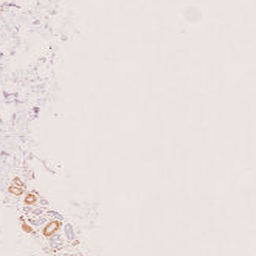

In [66]:
img